In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
df = pd.read_csv('Credit_Scoring.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [4]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
df.isna()
pass

In [6]:
df.isna()[(df.isna()['NumberOfDependents'] == True) | (df.isna()['MonthlyIncome'] == True)]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
8,False,False,False,False,False,False,True,False,False,False,False,False
24,False,False,False,False,False,False,True,False,False,False,False,False
33,False,False,False,False,False,False,True,False,False,False,False,False
44,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149968,False,False,False,False,False,False,True,False,False,False,False,False
149969,False,False,False,False,False,False,True,False,False,False,False,False
149976,False,False,False,False,False,False,True,False,False,False,False,False
149984,False,False,False,False,False,False,True,False,False,False,False,False


In [7]:
df[(df.isna()['NumberOfDependents'] == True) | (df.isna()['MonthlyIncome'] == True)]
pass

In [8]:
df_clean = df.dropna(axis=0)
df_clean.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
5,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120262 entries, 1 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            120262 non-null  int64  
 1   SeriousDlqin2yrs                      120262 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  120262 non-null  float64
 3   age                                   120262 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  120262 non-null  int64  
 5   DebtRatio                             120262 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       120262 non-null  int64  
 8   NumberOfTimes90DaysLate               120262 non-null  int64  
 9   NumberRealEstateLoansOrLines          120262 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  120262 non-null  int64  
 11  

In [10]:
print(f'Loss percentage is {((df.shape[0] - df_clean.shape[0]) * 100)/df.shape[0]}%')

Loss percentage is 19.82105712304656%


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

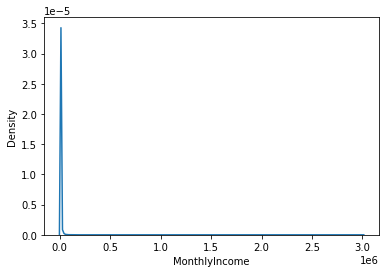

In [11]:
#Vizualization MonthlyIncome
sns.kdeplot(data=df_clean['MonthlyIncome'])

<AxesSubplot:xlabel='NumberOfDependents', ylabel='Density'>

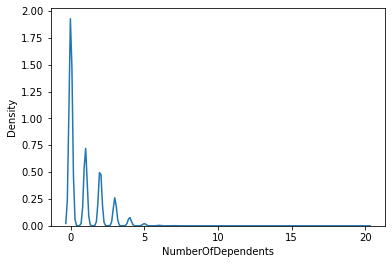

In [12]:
#Vizualization NumberOfDependents
sns.kdeplot(data=df_clean['NumberOfDependents'])

In [13]:
df['MonthlyIncome'].interpolate(axis=0, inplace=True)

In [14]:
mean_NumberOfDependents = df_clean['NumberOfDependents'].mean()
df['NumberOfDependents'].fillna(value=mean_NumberOfDependents, axis=0, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         149991 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [19]:
# sns.kdeplot(data=df['MonthlyIncome'])

In [18]:
# sns.kdeplot(data=df['NumberOfDependents'])

<AxesSubplot:>

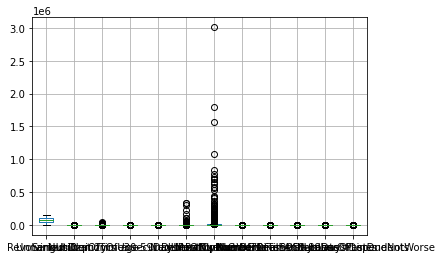

In [21]:
#Spot the outliner
df.boxplot()

/home/longdp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

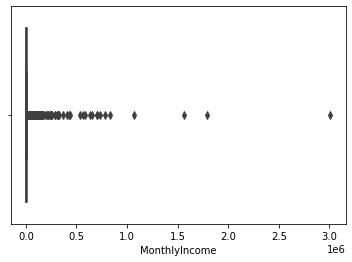

In [24]:
sns.boxplot(df['MonthlyIncome'])

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Unnamed: 0                              74995.500000
SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines        0.529149
age                                        22.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.693217
MonthlyIncome                            4628.750000
NumberOfOpenCreditLinesAndLoans             6.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                2.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          1.000000
dtype: float64

In [27]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
7,16,0,0.548458,64,0,0.209892,11362.0,7,0,1,0,2.0
9,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0


<AxesSubplot:>

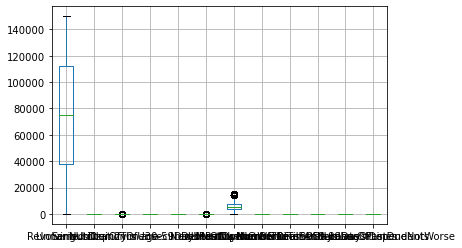

In [28]:
df.boxplot()

In [31]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,76590.000000,76590.0,76590.000000,76590.000000,76590.0,76590.000000,76590.000000,76590.000000,76590.0,76590.000000,76590.0,76590.000000
mean,75079.982870,0.0,0.264387,52.914597,0.0,0.317914,5803.137361,8.044157,0.0,0.929416,0.0,0.522302
std,43265.220436,0.0,0.317209,15.392623,0.0,0.281928,3128.117722,4.296203,0.0,0.941085,0.0,0.742715
min,11.000000,0.0,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,37725.250000,0.0,0.023152,41.000000,0.0,0.111327,3423.000000,5.000000,0.0,0.000000,0.0,0.000000
50%,75225.500000,0.0,0.111603,53.000000,0.0,0.268747,5203.500000,7.000000,0.0,1.000000,0.0,0.000000
75%,112465.750000,0.0,0.417453,64.000000,0.0,0.443553,7758.750000,11.000000,0.0,2.000000,0.0,1.000000
max,150000.000000,0.0,1.341700,96.000000,0.0,1.908046,15084.000000,20.000000,0.0,5.000000,0.0,2.000000


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

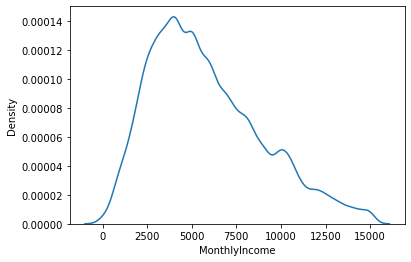

In [32]:
#Standardzilation
sns.kdeplot(data = df['MonthlyIncome'])

In [33]:
scaler = MinMaxScaler()

In [34]:
mms = scaler.fit_transform(pd.DataFrame(df['MonthlyIncome']))

<AxesSubplot:ylabel='Density'>

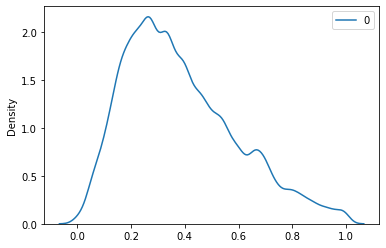

In [35]:
sns.kdeplot(data=mms)

In [36]:
robust = RobustScaler()

In [37]:
rbs = robust.fit_transform(pd.DataFrame(df['MonthlyIncome']))

<AxesSubplot:ylabel='Density'>

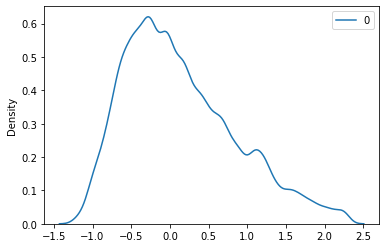

In [38]:
sns.kdeplot(data=rbs)